#Convolutional Neural Networks

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Let's take a look at a sample of the images in the dataset:

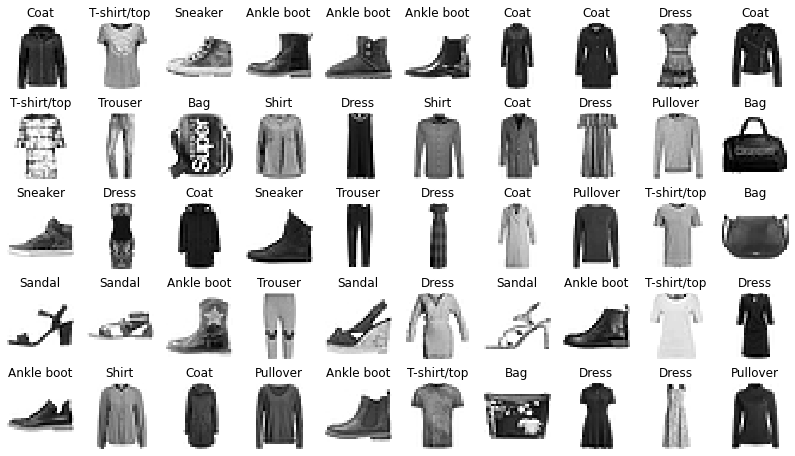

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
# define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
# Hint: For each feature (pixel intensity), you must subtract the mean() of that 
# feature (across all instances, so use axis=0) and divide by its standard 
# deviation (std(), again axis=0)

mean_train = np.mean(X_train, axis=0)
sd_train = np.std(X_train, axis=0)

X_train = (X_train - mean_train) / sd_train 
X_valid = (X_valid - mean_train) / sd_train 
X_test =  (X_test  - mean_train) / sd_train 


#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 2s 4ms/step - loss: 1.0336 - accuracy: 0.6784 - val_loss: 0.5127 - val_accuracy: 0.8336
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5051 - accuracy: 0.8292 - val_loss: 0.4397 - val_accuracy: 0.8564
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4410 - accuracy: 0.8513 - val_loss: 0.4097 - val_accuracy: 0.8672
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4056 - accuracy: 0.8588 - val_loss: 0.3895 - val_accuracy: 0.8664
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3825 - accuracy: 0.8670 - val_loss: 0.3783 - val_accuracy: 0.8738
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3642 - accuracy: 0.8728 - val_loss: 0.3635 - val_accuracy: 0.8764
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3471 - accuracy: 0.8781 - val_loss: 0.3539 - val_accuracy: 0.8796
Epoch 

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 0s - loss: 0.3668 - accuracy: 0.8698
accuracy: 86.98%


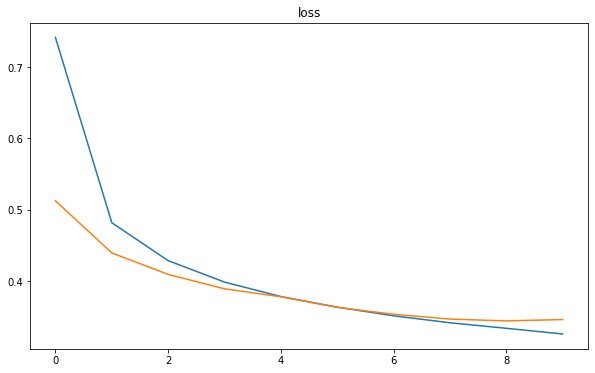

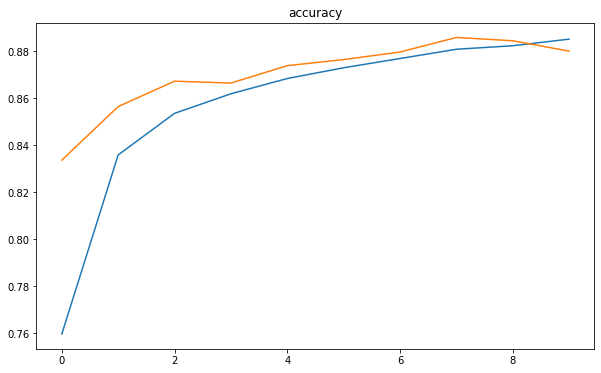

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

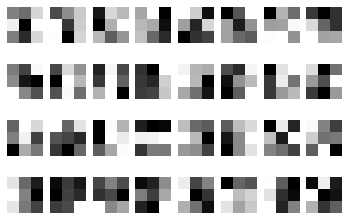

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

###Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   To determine the number of parameters on each of the two Conv2D layers we need to look at the architecture of the model and the size of the filters. In the first convolutional layers we have filters of size 3x3 so there are 9 parameters for each output filter, in this case 32. Now there are 288 (3 * 3 * 32) parameters. To reach the 320 parameters as in the summary it is also necessary to include the 32 parameters concerning the bias term for each filter. To calculate the number of parameters in the second convolutional layer we have to do the same but in this case we must also consider the "input" for this layer. In fact we now have 32 filters, generated in the first convolutional layer, as input and we have to take them into account. So in this second convolutional layer we have ((2 * 2 * 32) + 1) * 16 = 2064 parameters, the +1 is to take into account the bias for each output filter.

2.   The answer of this question is similar to the previos one but basically is because they have different kernel size and different number of output filters.
Also because the second layer has as 'input' 32 filter generated previously while the first layer has just the input image.

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 1.4293 - accuracy: 0.5111 - val_loss: 0.6799 - val_accuracy: 0.7734
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.6733 - accuracy: 0.7579 - val_loss: 0.5993 - val_accuracy: 0.7986
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5751 - accuracy: 0.7946 - val_loss: 0.5132 - val_accuracy: 0.8230
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5240 - accuracy: 0.8144 - val_loss: 0.4732 - val_accuracy: 0.8450
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4797 - accuracy: 0.8296 - val_loss: 0.4521 - val_accuracy: 0.8444
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4627 - accuracy: 0.8366 - val_loss: 0.4393 - val_accuracy: 0.8532
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4407 - accuracy: 0.8465 - val_loss: 0.4196 - val_accuracy: 0.8606
Epoch 

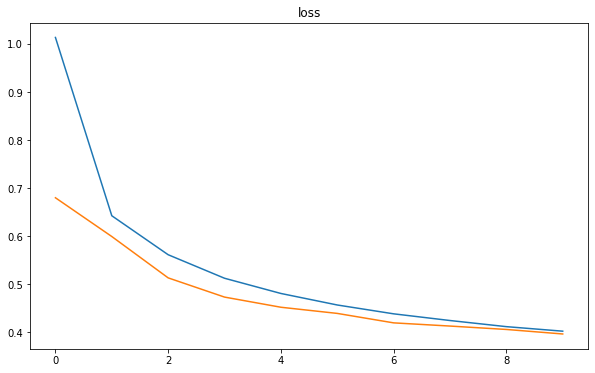

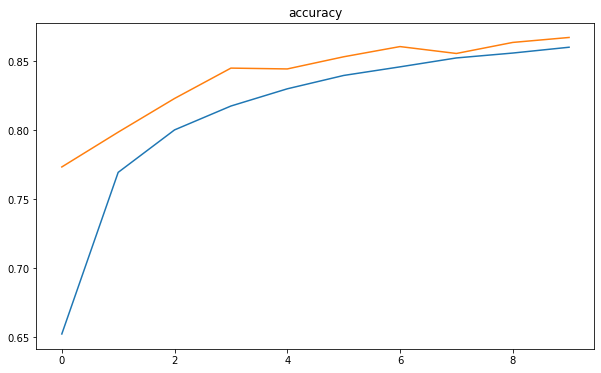

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## Exercise: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

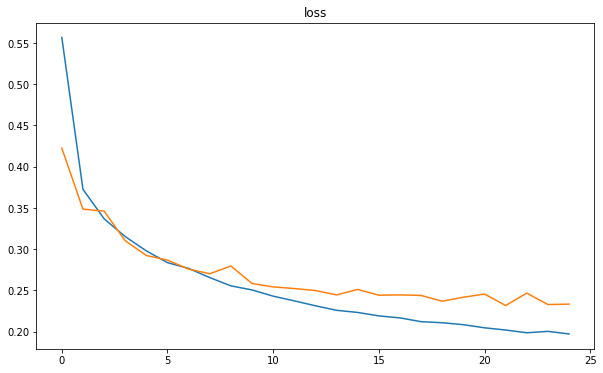

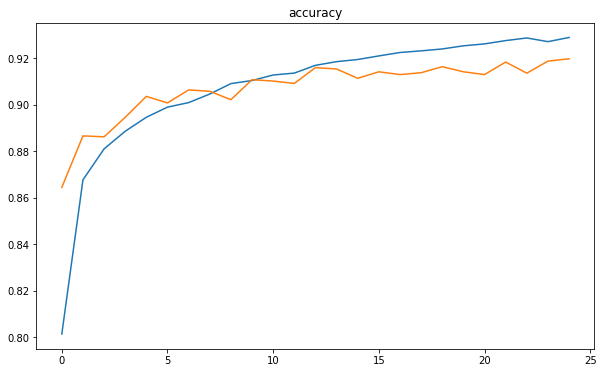

In [ ]:
model = keras.models.Sequential([
      keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
      keras.layers.MaxPool2D(pool_size=[2,2]),
      keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
      tf.keras.layers.Dropout(0.3),
      keras.layers.MaxPool2D(pool_size=[2,2]),
      keras.layers.Flatten(),
      keras.layers.Dense(10, activation="softmax")
    ])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])
print(model.summary())
history = model.fit(X_train, y_train, epochs=25, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")


### Example of tests discussion


Accuracy achieved in the test set is 91.18%.

I try many different models to find the best hyperparameters that maximize accuracy in the validation set. The first thing I did was change the optimizer to "Adam" instead of the simpler the stochastic gradient descent. Thanks to the new optimizer I have a sudden increase in validation accuracy, but I needed to find just the best learning rate. I also increased the number of epochs until I started to see the overfitting effects on the plots (in this case I don't use the early-stopping because I think it is not necessary in this very simple example, although it is always a good practice to include it). The next thing I did was try to add more layers to the network but, immediately after adding only one layer, there was a performance drop. To improve the results I changed the number of "output" filters for each level of convolution. I've found that increasing the number of filters will also increase validation accuracy without having a huge overfitting effect. I also try to change the kernel size but the best ones are the ones already used in the previous model.
Finally, to try to increase performance and try to reduce overfitting, I added a dropout layer and tuned the corresponding dropout rate.